# Visualizing and Animating positions

In [29]:
## Load in some dependencies
library(dplyr); library(data.table); library(ggplot2); library(ggforce)

In [30]:
nhwl_df <- read.csv("../input/nhwldata/Rotman MMA Summer Datathon NWHL.csv")
head(nhwl_df)

,game_date,Home.Team,Away.Team,Period,Clock,Home.Team.Skaters,Away.Team.Skaters,Home.Team.Goals,Away.Team.Goals,Team,⋯,Event,X.Coordinate,Y.Coordinate,Detail.1,Detail.2,Detail.3,Detail.4,Player.2,X.Coordinate.2,Y.Coordinate.2
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,⋯,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,⋯,Faceoff Win,100,43,Backhand,,,,Stephanie Anderson,NA,NA
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,⋯,Puck Recovery,107,40,,,,,,NA,NA
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,⋯,Zone Entry,125,28,Carried,,,,Maddie Rowe,NA,NA
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,⋯,Shot,131,28,Snapshot,On Net,t,f,,NA,NA
5,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,⋯,Faceoff Win,169,21,Backhand,,,,Stephanie Anderson,NA,NA
6,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:52,5,5,0,0,Boston Pride,⋯,Puck Recovery,159,26,,,,,,NA,NA


In [31]:
nhwl_plays_df <- nhwl_df %>%
  filter(Event %in% c("Play", "Incomplete Play"), Detail.1 == "Direct", X.Coordinate >= 125, X.Coordinate.2 >= 125) %>%
  mutate(start_x = Y.Coordinate,
         start_y = X.Coordinate,
         end_x = Y.Coordinate.2,
         end_y = X.Coordinate.2,
         
         delta_x = end_x - start_x,
         delta_y = end_y - start_y,
         
         is_complete = ifelse(Event == "Play", 1, 0))

head(nhwl_plays_df,10)

,game_date,Home.Team,Away.Team,Period,Clock,Home.Team.Skaters,Away.Team.Skaters,Home.Team.Goals,Away.Team.Goals,Team,⋯,Player.2,X.Coordinate.2,Y.Coordinate.2,start_x,start_y,end_x,end_y,delta_x,delta_y,is_complete
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,⋯,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:43,5,5,0,0,Minnesota Whitecaps,⋯,Haley Mack,196,33,20,193,33,196,13,3,1
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:08,5,5,0,0,Minnesota Whitecaps,⋯,Nina Rodgers,161,14,10,168,14,161,4,-7,1
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:51,5,5,0,0,Boston Pride,⋯,McKenna Brand,175,47,65,195,47,175,-18,-20,0
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:36,5,5,0,0,Boston Pride,⋯,McKenna Brand,168,74,52,135,74,168,22,33,1
5,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:29,5,5,0,0,Boston Pride,⋯,Lauren Kelly,165,22,82,174,22,165,-60,-9,0
6,2021-01-23,Minnesota Whitecaps,Boston Pride,1,16:50,5,5,0,0,Minnesota Whitecaps,⋯,Haylea Schmid,180,48,53,199,48,180,-5,-19,1
7,2021-01-23,Minnesota Whitecaps,Boston Pride,1,16:40,5,5,0,0,Boston Pride,⋯,Samantha Davis,180,42,64,175,42,180,-22,5,0
8,2021-01-23,Minnesota Whitecaps,Boston Pride,1,16:38,5,5,0,0,Boston Pride,⋯,Taylor Turnquist,143,81,63,174,81,143,18,-31,1
9,2021-01-23,Minnesota Whitecaps,Boston Pride,1,16:32,5,5,0,0,Boston Pride,⋯,Samantha Davis,198,46,61,198,46,198,-15,0,1


In [32]:
# nhwl_plays_df <- nhwl_plays_df[nhwl_plays_df$Player == 'Taylor Woods', ]
# nhwl_plays_df <- nhwl_plays_df[nhwl_plays_df$Period == 2, ]
# nhwl_plays_df <- nhwl_plays_df[nhwl_plays_df$game_date == '2021-01-31', ]
# nhwl_plays_df

## Clustering

In [33]:
cluster_fit <- kmeans(nhwl_plays_df %>% select(start_x: delta_y), centers = 50)
nhwl_plays_df$cluster <- cluster_fit$cluster

In [37]:
cluster_summary <- nhwl_plays_df %>%
  group_by(cluster) %>%
  summarise(total_passes = n(),
            comp_rate = mean(is_complete))

risky_passes <- (cluster_summary %>%
                   arrange(comp_rate) %>%
                   .$cluster)[1:3]

safe_passes <- (cluster_summary %>%
                   arrange(desc(comp_rate)) %>%
                   .$cluster)[1:3]

## Plotting static clusters

In [38]:
# Plot clusters
risky_dat <- bind_rows(nhwl_plays_df %>%
                         filter(cluster == risky_passes[1]) %>%
                         sample_n(20, replace = FALSE),
                       nhwl_plays_df %>%
                         filter(cluster == risky_passes[2]) %>%
                         sample_n(20, replace = FALSE),
                       nhwl_plays_df %>%
                         filter(cluster == risky_passes[3]) %>%
                         sample_n(20, replace = FALSE))


risky_passes_plot <- ggplot(data = risky_dat, aes(end_x, end_y, col = factor(cluster))) + 
  geom_segment(aes(x = start_x, y = start_y, xend = end_x, yend = end_y),
               arrow = arrow(length = unit(0.3, "cm"))) +
  geom_circle(data = data.frame(x0 = 42.5, y0 = 100, r = 15), aes(x0 = x0, y0 = y0, r = r), 
              lwd = 0.5, col = "gray50", inherit.aes = FALSE) +
  geom_circle(data = data.frame(x0 = 20.5, y0 = 169, r = 15), aes(x0 = x0, y0 = y0, r = r),
              lwd = 0.5, col = "gray50", inherit.aes = FALSE) +
  geom_circle(data = data.frame(x0 = 64.5, y0 = 169, r = 15), aes(x0 = x0, y0 = y0, r = r),
              lwd = 0.5, col = "gray50", inherit.aes = FALSE) +
  geom_point(inherit.aes = FALSE, aes(x = 42.5, y = 100),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 20.5, y = 169),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 64.5, y = 169),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 20.5, y = 120),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 64.5, y = 120),
             col = "gray50", size = 1) +
  geom_segment(col = "gray50", inherit.aes = FALSE, lwd = 0.5, aes(x = 0, y = 189, xend = 85, yend = 189)) +
  geom_segment(col = "indianred", inherit.aes = FALSE, lwd = 0.5, aes(x = 39.5, y = 192.5, xend = 45.5, yend = 192.5)) + 
  geom_segment(col = "indianred", inherit.aes = FALSE, lwd = 0.5, aes(x = 39.5, y = 192.5, xend = 39.5, yend = 189)) +  
  geom_segment(col = "indianred", inherit.aes = FALSE, lwd = 0.5, aes(x = 45.5, y = 192.5, xend = 45.5, yend = 189)) +
  geom_segment(col = "gray50", inherit.aes = FALSE, lwd = 0.5, aes(x = 33.5, y = 189, xend = 28.5, yend = 200)) +
  geom_segment(col = "gray50", inherit.aes = FALSE, lwd = 0.5, aes(x = 51.5, y = 189, xend = 56.5, yend = 200)) +
  geom_hline(col = "gray50", yintercept = 125, lwd = 0.5) +
  scale_x_continuous(expand = c(0, 0)) + scale_y_continuous(expand = c(0,0)) +
  ylab("OFFENSIVE ZONE") +
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y = element_text(size=12),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(), 
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        panel.border = element_rect(colour = "gray50", fill=NA, size=0.2)) +
  coord_fixed(xlim = c(0,85), ylim = c(100,200)) +
  annotate("label", x = 42.5, y = 112.5, label = "Risky Passes", size = 5.5, fill = "mistyrose")


safe_dat <- bind_rows(nhwl_plays_df %>%
                        filter(cluster == safe_passes[1]) %>%
                        sample_n(20, replace = FALSE),
                      nhwl_plays_df %>%
                        filter(cluster == safe_passes[2]) %>%
                        sample_n(20, replace = FALSE),
                      nhwl_plays_df %>%
                        filter(cluster == safe_passes[3]) %>%
                        sample_n(20, replace = FALSE))


safe_passes_plot <- ggplot(data = safe_dat, aes(end_x, end_y, col = factor(cluster))) + 
  geom_segment(aes(x = start_x, y = start_y, xend = end_x, yend = end_y),
               arrow = arrow(length = unit(0.3, "cm"))) +
  geom_circle(data = data.frame(x0 = 42.5, y0 = 100, r = 15), aes(x0 = x0, y0 = y0, r = r), 
              lwd = 0.5, col = "gray50", inherit.aes = FALSE) +
  geom_circle(data = data.frame(x0 = 20.5, y0 = 169, r = 15), aes(x0 = x0, y0 = y0, r = r),
              lwd = 0.5, col = "gray50", inherit.aes = FALSE) +
  geom_circle(data = data.frame(x0 = 64.5, y0 = 169, r = 15), aes(x0 = x0, y0 = y0, r = r),
              lwd = 0.5, col = "gray50", inherit.aes = FALSE) +
  geom_point(inherit.aes = FALSE, aes(x = 42.5, y = 100),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 20.5, y = 169),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 64.5, y = 169),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 20.5, y = 120),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 64.5, y = 120),
             col = "gray50", size = 1) +
  geom_segment(col = "gray50", inherit.aes = FALSE, lwd = 0.5, aes(x = 0, y = 189, xend = 85, yend = 189)) +
  geom_segment(col = "indianred", inherit.aes = FALSE, lwd = 0.5, aes(x = 39.5, y = 192.5, xend = 45.5, yend = 192.5)) + 
  geom_segment(col = "indianred", inherit.aes = FALSE, lwd = 0.5, aes(x = 39.5, y = 192.5, xend = 39.5, yend = 189)) +  
  geom_segment(col = "indianred", inherit.aes = FALSE, lwd = 0.5, aes(x = 45.5, y = 192.5, xend = 45.5, yend = 189)) +
  geom_segment(col = "gray50", inherit.aes = FALSE, lwd = 0.5, aes(x = 33.5, y = 189, xend = 28.5, yend = 200)) +
  geom_segment(col = "gray50", inherit.aes = FALSE, lwd = 0.5, aes(x = 51.5, y = 189, xend = 56.5, yend = 200)) +
  geom_hline(col = "gray50", yintercept = 125, lwd = 0.5) +
  scale_x_continuous(expand = c(0, 0)) + scale_y_continuous(expand = c(0,0)) +
  ylab("OFFENSIVE ZONE") +
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y = element_text(size=12),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(), 
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        panel.border = element_rect(colour = "gray50", fill=NA, size=0.2)) +
  coord_fixed(xlim = c(0,85), ylim = c(100,200)) +
  annotate("label", x = 42.5, y = 112.5, label = "Safe Passes", size = 5.5, fill = "azure")

Risky passes: 

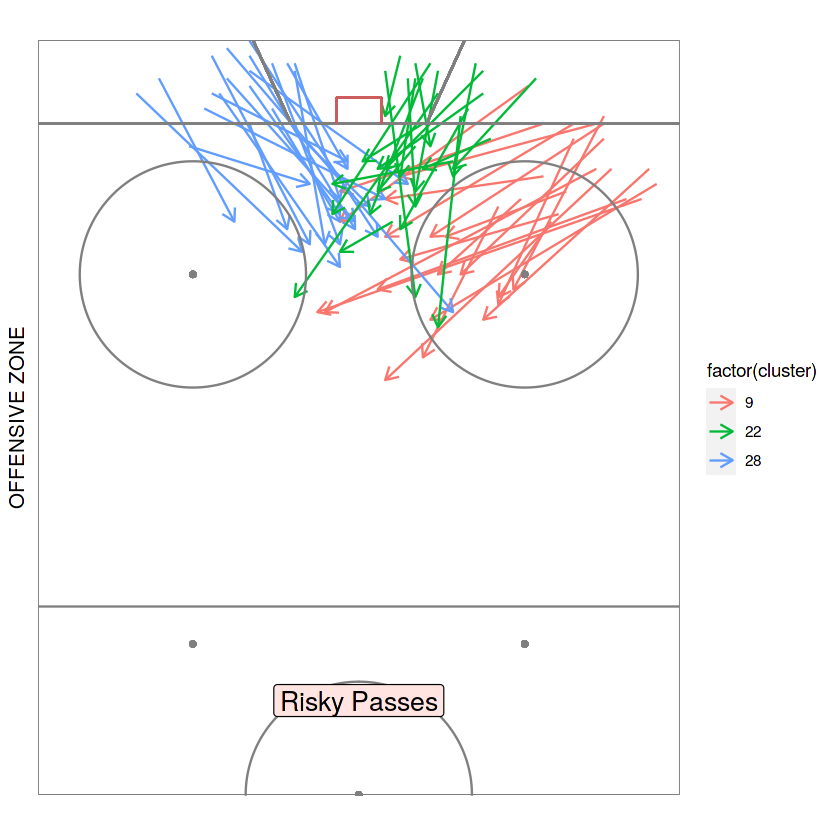

In [39]:
cat("Risky passes: ")
print(risky_passes_plot)

Safe passes: 

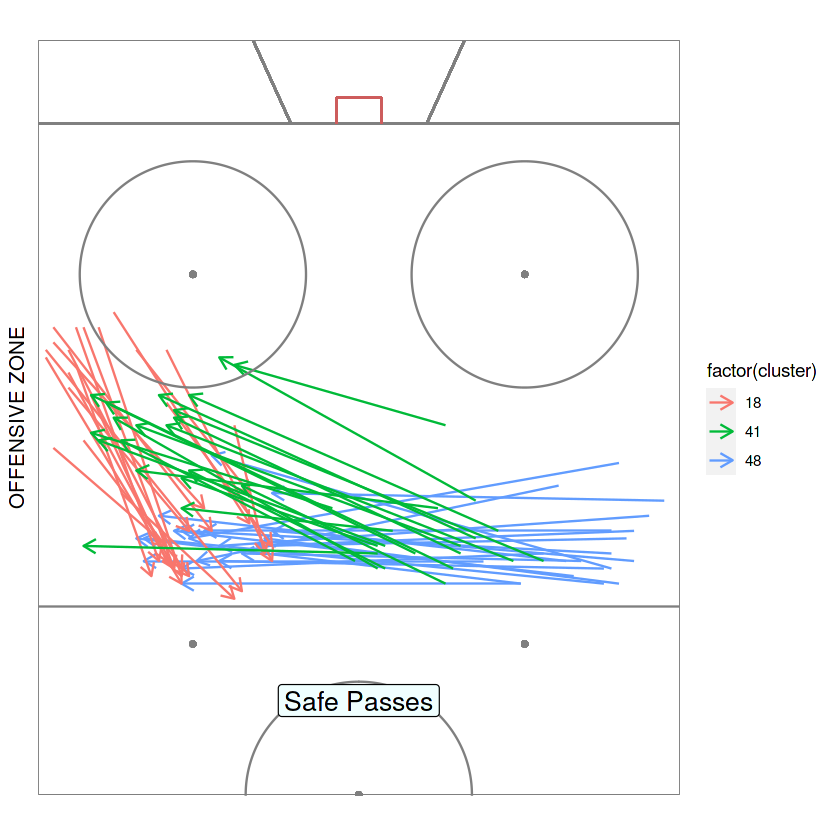

In [40]:
cat("Safe passes: ")
print(safe_passes_plot)

As we can see risky passes are close to the goal while the safe passes are away from the goal

In [41]:
library(gganimate)

anim <- risky_passes_plot + 
                      transition_states(Clock)

anim

<img src="data:image/gif;base64,R0lGODlh4AHgAfcAAAICAggHBwsLCxAODhQTExgVFR0cHCAdHCMjIyolJSsqKjQuLjMyMjw1
NTw8PEM8O0REREtDQktLS1FIR1JJSFhPTlpQT1RUVFxSUVtbW2BWVWNZV2ZbWmleXWxhX2Ji
Ym5iYWxsbHFlZHRoZndqaXptbHZ2dnx8fIJ0c4d5d4l6efh3bvd+dvh8dAe8Pgy9QRa/ShK+
RhjASx/CUCXDVDnHY0LJa03Mc1HNdljOe4+AfpCBf/iBeWnSiXnWlWWf/2ui/nGm/nqs/YWF
hYuLi5WFhJmJh5yLipSUlJqamqCPjaKRj6aUkqiWlK2bmbGenLShn6SkpKurq7ajobqmpL2p
p76qqLOzs7y8vPeMhfaPiPaak/ajncGtqsWwrseysMy2tM64ttS9u/aspvW8uPW4tIvao5Hb
p5bdrKnhutnCv4q1+4Wx/JO5+7LjwZ/B+rTO97jP97PN+L3T96rH+cPDw8nJydzFwtPT093d
3eHJx+XNyujPzfTIxerRzu7V0vHW1PPZ1vbd2vje28DnzMzp1NHr2fvh3svb9sbY9tvt4N3m
9OPj4+rq6uPv5/Pj4v/k4fPs6+rw7Ovu8+Pp8+/x8PLy8v///wAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACH5BAQKAAAAIf8LTkVUU0NBUEUyLjADAQAAACwA
AAAA4AHgAQAI/gAvCRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJ
kyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarV
q1izat3KtavXr2DDih1LtqzZs2jTql3Ltq3bt3Djyp1Lt67du3jz6t3Lt6/fv4ADCx5MuLDh
w4gTK17MuLHjx5AjS55MubLly5gza97MufPYRljqiB5NurTp06hTq17NurXr17Bjy55Nu7bt
27hz605tN08jz8BV2un9O7jxknWIH18ucnhd38yje3ROF7r06xmpz7WOvTtF7XK5/nsf/zD5
8+Lk0zMEH1e8+vcG2cN1D7/+Jflv6dt/b746+v314eeWfgCSJ2BbBBboXX/b/adgegeyleCD
10W41oQURmehWhhmuNyGaXXooXEMhufgiBUqh6J3IKIl4oqdtXjWizBuVmJ7J9Z4nIxm0agj
ZjyW5eOPlt04X45EehYkWUMmOdmSYzXpZGRQiiXllI9VGdaVWDZmZH5IdgmkimLGSGaZm2kJ
FpdoIvblgGG2+eSZcl6m5lds1knYmwjGqWeWdP4553mC2hlooZDd6VWeiPrFp4R+NpqYol0x
KulelHJl6aV5ZbrVppze9eiFkYZKmKdagWoqXahmpeqq/nKNymGpsALWKlav1vrWrVflqmtb
vFrl669rBVvVsMSmJWuItCarl7FUIeusWdBOJe20ZFUr1bXYirWsi812W5e2UXEr7lfkQmXu
uV19O2O47MaV7lPrxqvVvE7Vay9W+Dal775W9cvUvyo1YkkjBltiyX4KG4zwwlK52yO8OTWS
Rx1XRIEEEUOcMATHH3f8MRJRXFEHwXkxggcWUiTB8QkncCyzyEQkIQUWdjACMVICL4XyRnlg
EcUQQyRxBRZ4MGIwQgerXEfLH0dxsmaW4HEFElFfYUceOieEcB52CI01ElLYQTFNPSv1s0WN
1JHEEEhcgcfZBTVix9VDRGHH/s6QMYIF1klgkQffFDFSx9BEyD1U2kmtLVHbG0uBB+Eb2T10
Ens3xsgVRCSeR0iGvy05UBILSXdKeAw9+kl2qP75YZbUsfEVjJwEORFYnI4S40g5zlDsRCCR
NvBIlC5XI1fk/fpKmyu/E+9H+Z6QJVgQEcXyL+HhsvFtNSLFEFdQvhLwSWBfE/dW6h4SFkNI
UXtNeURBBPpneY+7+C/ZgUT5N0FvlPQFwYP13oeTPCQBCeajS/XCpxM7WE990zkUSxpxQDz4
RIBSwF9bBBgFCJaEekPAAtokqJI6hDAoluCc/1AoPwsChYJIIGD+SGi7JCTBg8wjmQbNIsAr
FMUO/kOg30aEiCccVgSIRIQJ5xJ4liUehYJJ2GFJVkgUx3FOhkbBwwnT0ggdKqV6TGQdDUVi
iSREQYpB6WIUXIS7pmgxid8ZI0gY0canSAEJRlQKEF3YlC76cCVw1FQeHZKH+Unlb1j0SvUG
SZMyrlE4cuyIAPkYFQcmcitXQyNSohDFlFBxKPoSYBidAsRLYiWTVmmZJocYSY3kYQijfIoW
TVkVVF6lZbtrJUZeGUuoCJCRPfnbKpmCS5N8UijmoiMlsVIHIgxTKbIDZk/MaExdVsQSRDhm
Sv6GlV96JXBTtCZFkCDCr0ThkVShYy+pgs1qBfJT0hyIFND5leKxU3hh/qEjLTWiTaBIS3/P
lEojYDmVKEhhLA4MaET6+RNkDXSfWhGgQn8iu7LMsznihIg9y5IxqDzULPgEyTtTJU23oSWk
TdloWRgxBGky1Ce+Gmg8j0LHierEpGgRGkhe2hNfJWGkTbnCQZfSCCLMFClEWCY/M7oeJKwF
m+v8SRTKGSJnegSouGIkEaKKLqc2zqprmWoECcURnbYFc0lBK1sGatOE8JQnqrJESwdEBJ55
tS1X+ONG3roTVbEMLmotCgLfItc8YrVXRizsfOpaFDzc1S155QhfdQKqv8YFpUJBglLXwta9
MhUhRIDoWbRXRcbG5WasJCtGHEuX0A5FanOh/qNnVXuRwMbFskCRa1vrudmJTDYnlhpoXXQb
lKeNi54W+W0BPYgFvc5Fb0EZLF2IixHl3sRS0mUVcnciXLtAFyOHFRYEZWsX6gbTuXMhbXU/
S5Dm4uW7PdHsXcx7RPYOJLt1MW5P5JqXJPQWIta1SZ7oS5fu8iR1edGvRcJ7LPWpFy+u5YkU
GHwV8ibXvpc4ml4m3JMIQ1h9AYaf+vjXqe3ahL96icJ/HUJha6lvCLslCyMei5MH4wULVI0j
bSVi4bzAeCc43ouNfWvf1vEFvzcp214MrGP/WCTIe4EvTpB8lx/Xd8cRUfJeoJwTK+slhgu2
L4mfNVScMDkvUpZI/ohpwiYP58WAOplxX0x2YSxDxMt5KSplk9AX917ZyRRB8V4E3T8T28UO
ZZ5Ii7d1ujPjhdA2wVhfEF1nQE9Ez305QYxFImm+IPjPDaqInDO96fXl+M18rsiiy3W6UfMF
zzXhsl7gDGoTVSQPNPZxqUGiYb7gutKhLlyu8QJrmsga1cC2NUUwzZcT6OTYeBnyQtnLbL1A
+nzojbahWczea9/F0WhLdILFPW07P0TTfOmxgFO95VOX29ITMaqv2X0TV+uFzrXGkUWofGhy
0wTc3l0xQ1atLt1pWS/Qrkmx7QLmfB/pye62y8GnzFW3LPwha54Jm4y8F37TZOLfHsJF/ghO
L92pu8q7Xl+2n7Nth2RcJnm6uFxObpNP58XPDgdTbSteLH/XBODPFfh6MNxrvHCYJ/L2MYgx
LO3WijYmR78LzSNC8nypj8BzqX